### **Descriptive Analytics for Numerical Columns**

●	Objective: To compute and analyze basic statistical measures for numerical columns in the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/sales_data_with_discounts.csv")

In [4]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.50120
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102960,89323.89704
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910160,102042.08980
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.92530
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.05377


In [3]:
numerical_columns = df.select_dtypes(include=['number']).columns
print(numerical_columns)


Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [12]:
df.max()

,0
Date,15-04-2021
Day,Wednesday
SKU,M10
City,C
Volume,31
BU,Mobiles
Brand,YouM
Model,YM-99 Plus
Avg Price,60100
Total Sales Value,196400


In [13]:
df.min()

,0
Date,01-04-2021
Day,Friday
SKU,F01
City,C
Volume,1
BU,FMCG
Brand,Babaji
Model,Babaji Cream
Avg Price,290
Total Sales Value,400


In [9]:
df.Volume.mean()

5.066666666666666

In [15]:
mean_vol = df['Volume'].mean()
print("Mean of Volume:", mean_vol)


Mean of Volume: 5.066666666666666


In [18]:
df.Volume.median()

4.0

In [19]:
df.Volume.mode()

,Volume
0,3


In [20]:
std_dev_vol = df['Volume'].std()
print("Standard deviation of volume:", std_dev_vol)


Standard deviation of volume: 4.231602391213923


In [21]:
df.dtypes

,0
Date,object
Day,object
SKU,object
City,object
Volume,int64
BU,object
Brand,object
Model,object
Avg Price,int64
Total Sales Value,int64


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


In [23]:
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495426,47847.912855
max,31.000000,60100.000000,196400.000000,19.992407,25738.022190,179507.479000


### **Data Visualization**

●	Objective: To visualize the distribution and relationship of numerical and categorical variables in the dataset.

**Histogram**

In [25]:
import matplotlib.pyplot as plt

(array([213., 137.,  49.,  26.,  15.,   2.,   0.,   4.,   1.,   3.]),
 array([ 1.,  4.,  7., 10., 13., 16., 19., 22., 25., 28., 31.]),
 <BarContainer object of 10 artists>)

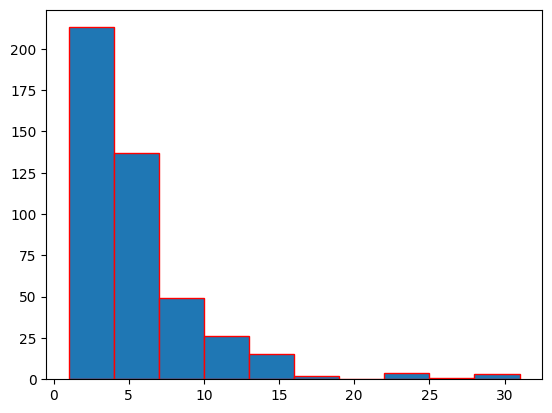

In [27]:
# Histogram - inbuilt function for histogram is hist()
plt.hist(df.Volume,edgecolor="red")

**Boxplots**

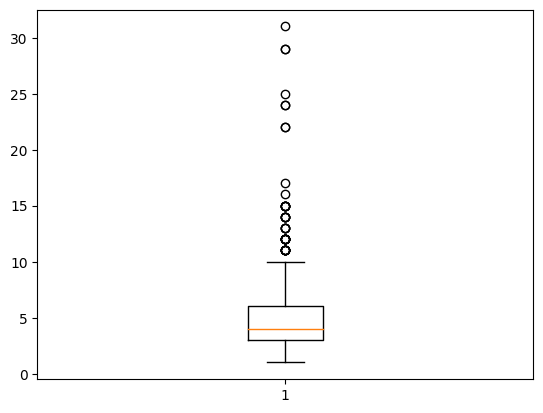

In [28]:
# Boxplot
plt.boxplot(df.Volume)
plt.show()

**Barchart**

<Axes: xlabel='Volume'>

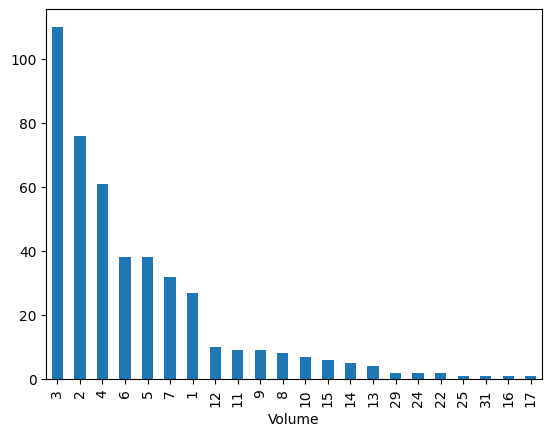

In [29]:
# Bar Plot
df['Volume'].value_counts().plot.bar()

<Axes: xlabel='Discount Amount'>

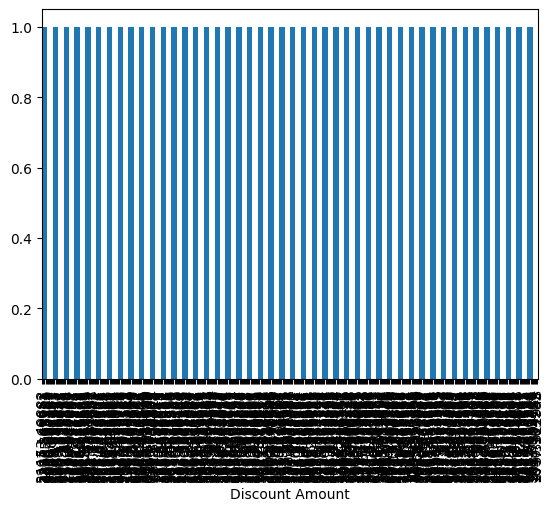

In [30]:
# Bar Plot
df['Discount Amount'].value_counts().plot.bar()

### **Standardization of Numerical Variables**

A z-score tells us how many standard deviations away a value is from the mean. We use the following formula to calculate a z-score:
z = (X – μ) / σ.Large z-score tells us that measurement is larger than almost all other measurements in the dataset.Small z-score tells us that the measure is smaller than all other measurements.If a z-score is zero,then the observation lies on the mean


●	Objective: To scale numerical variables for uniformity, improving the dataset’s suitability for analytical models.

In [35]:
from sklearn.preprocessing import StandardScaler

# Sample data
data = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
standardized_data = scaler.fit_transform(data)

print(standardized_data)


[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]


### **Conversion of Categorical Data into Dummy Variables**

In [37]:
# Create dummy variables
df_dummies = pd.get_dummies(df)

print(df_dummies)

     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0        15      12100             181500          11.654820     21153.498820   
1        10      10100             101000          11.560498     11676.102960   
2         7      16100             112700           9.456886     10657.910160   
3         6      20100             120600           6.935385      8364.074702   
4         3       8100              24300          17.995663      4372.946230   
..      ...        ...                ...                ...              ...   
445       2       1300               2600          15.475687       402.367873   
446       6       2600              15600          17.057027      2660.896242   
447       2       1600               3200          18.965550       606.897606   
448       3       1900               5700          16.793014       957.201826   
449       1       3100               3100          15.333300       475.332295   

     Net Sales Value  Date_